## TASK-2 UNEMPLOYMENT ANALYSIS WITH PYTHON

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("unemployment_in_india.csv")

In [3]:
df.head()  

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [4]:
# Checking number of rows and columns.
print("Number of rows are: ",df.shape[0])
print("Number of columns are: ",df.shape[1])
     

Number of rows are:  768
Number of columns are:  7


In [5]:
df.describe(include='all')

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
count,740,740,740,740.000000,7.400000e+02,740.000000,740
unique,28,14,2,NaN,NaN,NaN,2
top,Andhra Pradesh,31-10-2019,Monthly,NaN,NaN,NaN,Urban
freq,28,55,381,NaN,NaN,NaN,381
mean,NaN,NaN,NaN,11.787946,7.204460e+06,42.630122,NaN
std,NaN,NaN,NaN,10.721298,8.087988e+06,8.111094,NaN
min,NaN,NaN,NaN,0.000000,4.942000e+04,13.330000,NaN
25%,NaN,NaN,NaN,4.657500,1.190404e+06,38.062500,NaN
50%,NaN,NaN,NaN,8.350000,4.744178e+06,41.160000,NaN
75%,NaN,NaN,NaN,15.887500,1.127549e+07,45.505000,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [7]:
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 27


In [8]:
df.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

### Some basic characterstics of dataset

* The unemployment dataset consists of Region, Date, Unemployment Rate etc. for Indian states.
* There are 768 rows and 7 columns provided in the data.
* 27 duplicate rows present in the dataset.
* 28 null values present in each of the columns available in dataset.

In [9]:
df.columns = ['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)', 'Estimated Employed',
              'Estimated Labour Participation Rate (%)','Area']
df_stat = df[['Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)']]
print(round(df_stat.describe().T, 2))

                                         count        mean         std  \
Estimated Unemployment Rate (%)          740.0       11.79       10.72   
Estimated Employed                       740.0  7204460.03  8087988.43   
Estimated Labour Participation Rate (%)  740.0       42.63        8.11   

                                              min         25%         50%  \
Estimated Unemployment Rate (%)              0.00        4.66        8.35   
Estimated Employed                       49420.00  1190404.50  4744178.50   
Estimated Labour Participation Rate (%)     13.33       38.06       41.16   

                                                 75%          max  
Estimated Unemployment Rate (%)                15.89        76.74  
Estimated Employed                       11275489.50  45777509.00  
Estimated Labour Participation Rate (%)        45.50        72.57  


### Summary of Descriptive Statistics

Below are the key descriptive statistics extracted for each variable:

---

 **1. Estimated Unemployment Rate (%)**
- Count: 740  
- Mean: 11.79  
- Standard Deviation (std): 10.72 
- Minimum (min): 0 
- 25% (Q1): 4.66  
- 50% (Median): 8.35  
- 75% (Q3): 15.89  
- Maximum (max): 76.74  

---

 **2. Estimated Employed**
- Count: 740  
- Mean: 7204460.03  
- Standard Deviation (std): 8087988.43  
- Minimum (min): 49420  
- 25% (Q1): 1190404.50  
- 50% (Median): 4744178.50  
- 75% (Q3): 11275489.50  
- Maximum (max): 45777509  

---

 **3. Estimated Labour Participation Rate (%)**
- Count: 740  
- Mean: 42.63  
- Standard Deviation (std): 8.11  
- Minimum (min): 13.33  
- 25% (Q1): 38.06 
- 50% (Median): 41.16  
- 75% (Q3): 45.50  
- Maximum (max): 72.57  


In [10]:
# Cleaning and preprocessing the data
df.columns = df.columns.str.strip()  # Remove extra spaces from column names
df = df.dropna()  # Drop missing values
df['Date'] = df['Date'].str.strip()  # Remove leading/trailing spaces in Date column
df['Date'] = pd.to_datetime(df['Date'], format="%d-%m-%Y")  # Convert to datetime format

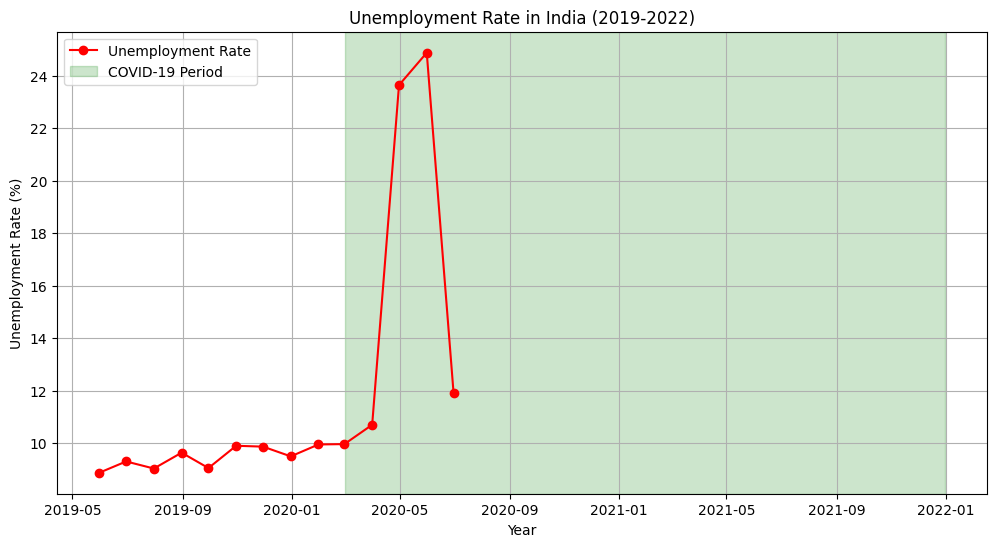

In [11]:
# Aggregating unemployment rate at the national level
df_national = df.groupby("Date")["Estimated Unemployment Rate (%)"].mean()

# Ploting the unemployment rate over time
plt.figure(figsize=(12, 6))
plt.plot(df_national.index, df_national.values, marker='o', linestyle='-', color='r', label="Unemployment Rate")

# Highlighting the COVID-19 period (March 2020 - December 2021)
plt.axvspan(pd.to_datetime("2020-03-01"), pd.to_datetime("2021-12-31"), color='g', alpha=0.2, label="COVID-19 Period")

# Formatting the plot
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")
plt.title("Unemployment Rate in India (2019-2022)")
plt.legend()
plt.grid(True)

# Displaying the plot
plt.show()


### Interpretation of the Graph

This graph shows the **unemployment rate in India from 2019 to 2022**, with a green-shaded area indicating the **COVID-19 period**. From mid-2019 to early 2020, the unemployment rate remained relatively stable, hovering around 9–10%. However, in mid-2020, there is a **dramatic spike**, with unemployment climbing above 24%. This surge aligns with the onset of the COVID-19 lockdown measures, which severely impacted the labor market. After reaching its peak, the unemployment rate gradually **declined** as economic activities resumed, eventually returning closer to its pre-pandemic levels.


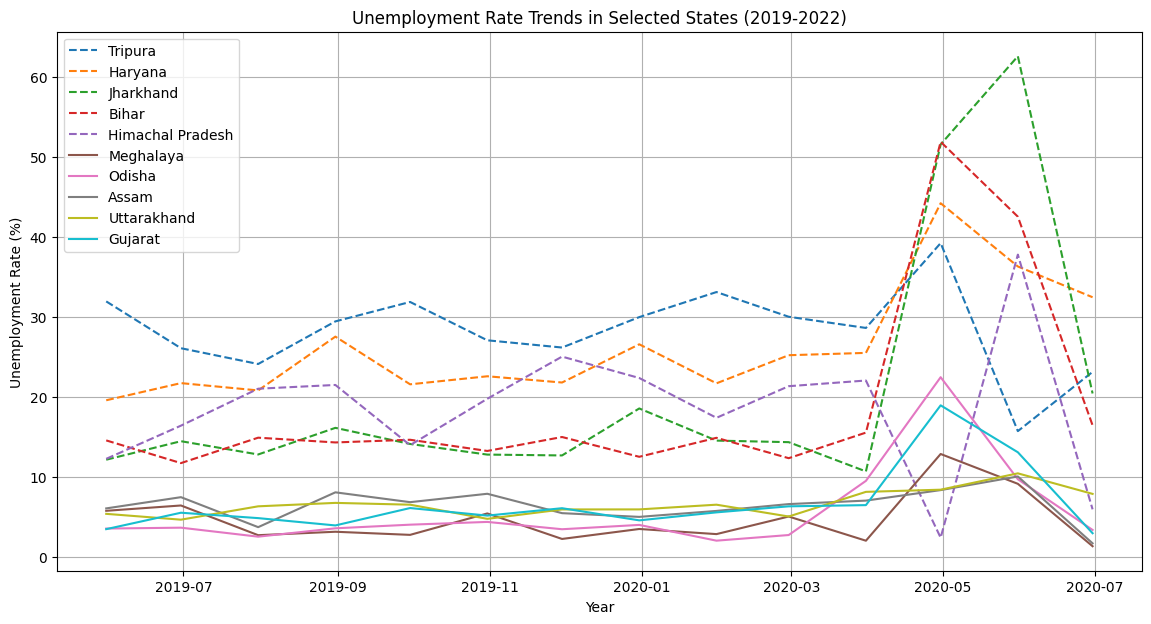

Top 5 states with highest unemployment rate: ['Tripura', 'Haryana', 'Jharkhand', 'Bihar', 'Himachal Pradesh']
Top 5 states with lowest unemployment rate: ['Meghalaya', 'Odisha', 'Assam', 'Uttarakhand', 'Gujarat']


In [12]:
# State-wise analysis:
# Calculating average unemployment rate per state over time
df_statewise = df.groupby(["Region", "Date"])["Estimated Unemployment Rate (%)"].mean().reset_index()

# Computing the average unemployment rate for each state over the entire period
state_avg_unemployment = df_statewise.groupby("Region")["Estimated Unemployment Rate (%)"].mean()

# Identifying the top 5 states with the highest and lowest unemployment rates
top_5_highest = state_avg_unemployment.nlargest(5).index
top_5_lowest = state_avg_unemployment.nsmallest(5).index

# Plotting unemployment trends for these selected states
plt.figure(figsize=(14, 7))

# Plotting top 5 highest unemployment states
for state in top_5_highest:
    state_data = df_statewise[df_statewise["Region"] == state]
    plt.plot(state_data["Date"], state_data["Estimated Unemployment Rate (%)"], label=state, linestyle="--")

# Plotting top 5 lowest unemployment states
for state in top_5_lowest:
    state_data = df_statewise[df_statewise["Region"] == state]
    plt.plot(state_data["Date"], state_data["Estimated Unemployment Rate (%)"], label=state, linestyle="-")

# Formatting the plot
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")
plt.title("Unemployment Rate Trends in Selected States (2019-2022)")
plt.legend()
plt.grid(True)

# Displaying the plot
plt.show()

# Print the top and bottom 5 states based on average unemployment rate
print("Top 5 states with highest unemployment rate:", list(top_5_highest))
print("Top 5 states with lowest unemployment rate:", list(top_5_lowest))







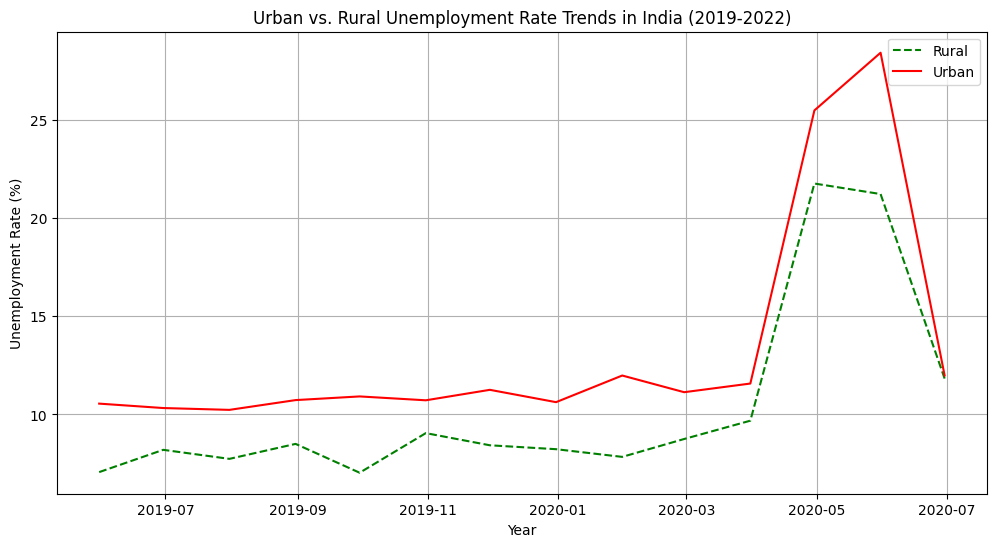

In [13]:
# Urban v/s rural analysis:
# Grouping the data by 'Area' (Urban/Rural) and 'Date', then we will calculate the average unemployment rate
df_areawise = df.groupby(["Area", "Date"])["Estimated Unemployment Rate (%)"].mean().reset_index()

# Plotting unemployment trends for urban vs. rural areas
plt.figure(figsize=(12, 6))

# Plotting rural unemployment trends
rural_data = df_areawise[df_areawise["Area"] == "Rural"]
plt.plot(rural_data["Date"], rural_data["Estimated Unemployment Rate (%)"], label="Rural", linestyle="--", color="g")

# Plotting urban unemployment trends
urban_data = df_areawise[df_areawise["Area"] == "Urban"]
plt.plot(urban_data["Date"], urban_data["Estimated Unemployment Rate (%)"], label="Urban", linestyle="-", color="r")

# Formatting the plot
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")
plt.title("Urban vs. Rural Unemployment Rate Trends in India (2019-2022)")
plt.legend()
plt.grid(True)

# Displaying the plot
plt.show()

### Graph Interpretation

This graph shows the trends in unemployment rates for urban and rural areas over time. Here’s what it tells us:

- **Stable Trends (2019 to early 2020):** Both urban and rural unemployment rates were relatively steady, with urban rates slightly higher than rural.
- **Pandemic Impact (Mid-2020):** Around mid-2020, both rates experienced a sharp increase due to the COVID-19 lockdowns. Urban unemployment spiked above 25%, while rural unemployment also rose significantly, though not as high as the urban rate.
- **Recovery Phase:** After this peak, the rates for both urban and rural areas started to decline, reflecting a gradual economic recovery as restrictions eased and activities resumed.

Overall, the graph effectively illustrates how the COVID-19 pandemic caused a sudden rise in unemployment, followed by a recovery phase in both urban and rural regions.


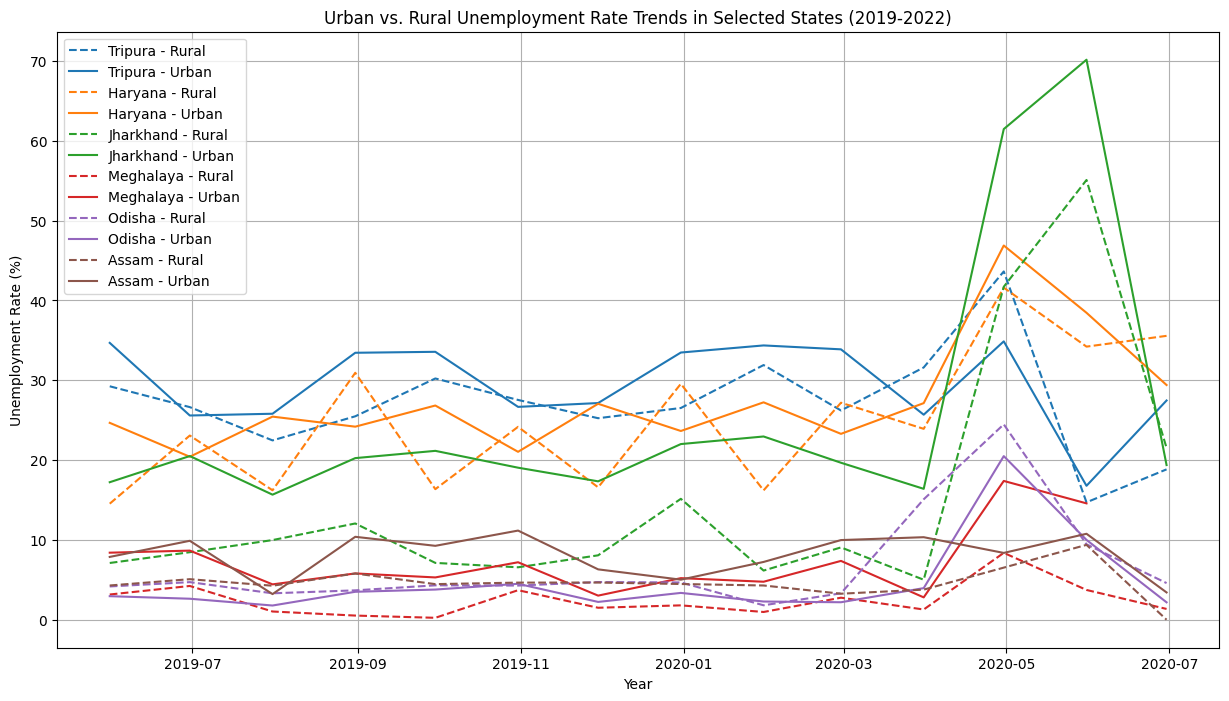

In [14]:
# Using matplotlib's 'tab10' colormap to generate a list of colors
colors = plt.cm.tab10.colors

df_statewise = df.groupby(["Region", "Date"])["Estimated Unemployment Rate (%)"].mean().reset_index()

# Computing the average unemployment rate for each state over the entire period
state_avg_unemployment = df_statewise.groupby("Region")["Estimated Unemployment Rate (%)"].mean()

# Identifying top 3 states with highest and lowest unemployment rates
top_3_highest_states = state_avg_unemployment.nlargest(3).index
top_3_lowest_states = state_avg_unemployment.nsmallest(3).index

# Selecting states for analysis
selected_states = list(top_3_highest_states) + list(top_3_lowest_states)

# Filtering data for selected states
df_selected_states = df[df["Region"].isin(selected_states)]

# Grouping data by 'Region', 'Area' (Urban/Rural), and 'Date' to calculate average unemployment rates
df_state_area = df_selected_states.groupby(["Region", "Area", "Date"])["Estimated Unemployment Rate (%)"].mean().reset_index()

# Mapping each state to a unique color
state_color = {state: colors[i % len(colors)] for i, state in enumerate(selected_states)}

plt.figure(figsize=(15, 8))

# Loop through selected states and plot their Urban vs. Rural trends using the same color for both
for state in selected_states:
    state_data = df_state_area[df_state_area["Region"] == state]
    color = state_color[state]
    
    # Plotting rural unemployment trends with a dashed line
    rural_data = state_data[state_data["Area"] == "Rural"]
    plt.plot(rural_data["Date"], rural_data["Estimated Unemployment Rate (%)"],
             linestyle="--", color=color, label=f"{state} - Rural")
    
    # Plotting urban unemployment trends with a solid line
    urban_data = state_data[state_data["Area"] == "Urban"]
    plt.plot(urban_data["Date"], urban_data["Estimated Unemployment Rate (%)"],
             linestyle="-", color=color, label=f"{state} - Urban")

# Formatting the plot
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")
plt.title("Urban vs. Rural Unemployment Rate Trends in Selected States (2019-2022)")
plt.legend()
plt.grid(True)

# Displaying the plot
plt.show()


### Graph Interpretation

This chart compares **rural vs. urban unemployment rates** in several Indian states from 2019 to 2022. From 2019 through early 2020, unemployment levels remain relatively stable, showing only slight differences between rural and urban areas. However, around mid-2020, there is a **noticeable spike** in unemployment rates for both urban and rural areas—likely due to the COVID-19 lockdown measures. 

Some states, like **Tripura** and **Haryana**, experienced especially high unemployment peaks during this period, while others, such as **Assam** and **Odisha**, show smaller increases. Overall, it’s clear that every state felt the impact of the pandemic, but the **extent of the surge** varied by region and by whether the area was rural or urban.
